In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv('SALES_DATA.csv')

In [3]:
df.head(n=12)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
5,T1000006,249,S1,L3,R2,2018-01-01,1,Yes,39,34211.22
6,T1000007,248,S1,L1,R2,2018-01-01,1,Yes,40,35352.66
7,T1000008,247,S1,L1,R3,2018-01-01,1,Yes,64,52650.00
8,T1000009,246,S3,L1,R3,2018-01-01,1,Yes,62,42633.78
9,T1000010,254,S4,L1,R1,2018-01-01,1,Yes,87,62572.80


In [4]:
df.tail(n=10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188330,T1188331,147,S4,L2,R4,2019-05-31,1,No,84,48026.88
188331,T1188332,31,S1,L5,R2,2019-05-31,1,No,48,27760.08
188332,T1188333,150,S4,L2,R1,2019-05-31,1,Yes,137,86994.18
188333,T1188334,339,S4,L2,R1,2019-05-31,1,No,85,50018.34
188334,T1188335,151,S1,L3,R2,2019-05-31,1,No,38,24105.60
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [5]:
# Check missing values
print(df.isnull().sum())

# Impute missing Sales with median
#df['Sales'].fillna(df['Sales'].median(), inplace=True)

# Impute missing categorical variables with mode
#df['Store_Type'].fillna(df['Store_Type'].mode()[0], inplace=True)

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,42326.000000,42326.000000,42326.000000,42326.000000
mean,183.003898,0.146600,67.412631,42342.602834
std,105.362390,0.353711,28.754102,17280.932550
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30570.000000
50%,183.000000,0.000000,62.000000,39519.000000
75%,274.000000,0.000000,81.000000,51298.500000
max,365.000000,1.000000,305.000000,185184.000000


# UNIVARATIVE ANALYSIS


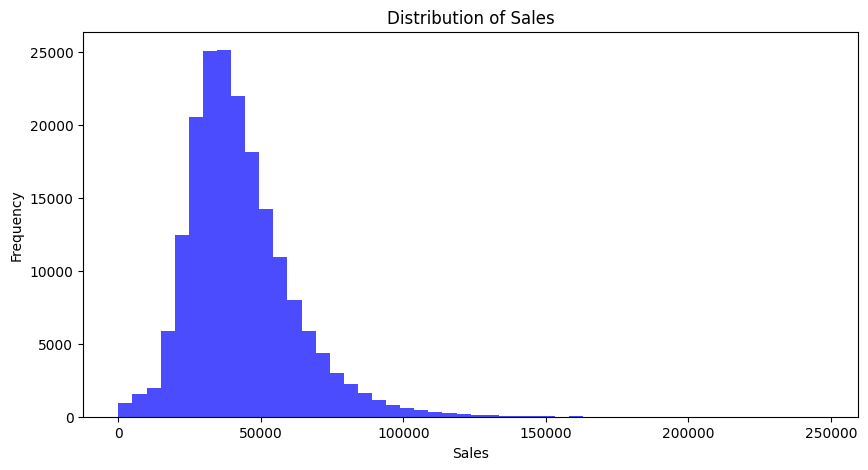

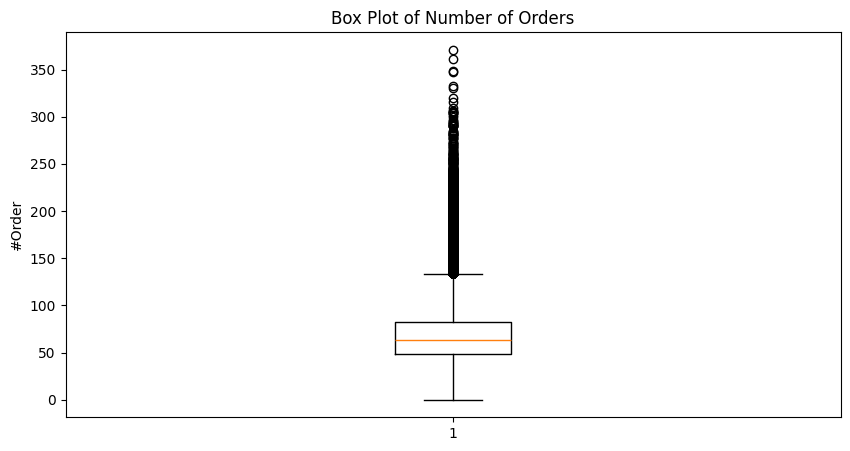

In [7]:
# Histogram for Sales
plt.figure(figsize=(10, 5))
plt.hist(df['Sales'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Box plot for #Order
plt.figure(figsize=(10, 5))
plt.boxplot(df['#Order'])
plt.title('Box Plot of Number of Orders')
plt.ylabel('#Order')
plt.show()

# BIVARATIVE ANALYSIS


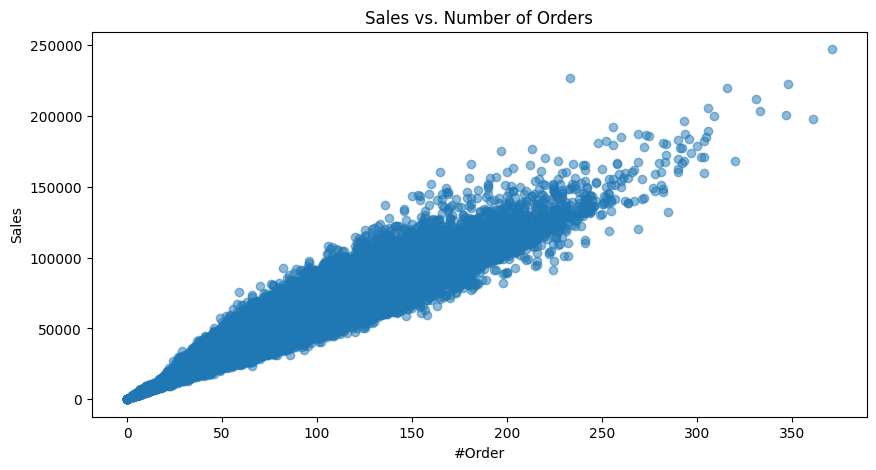

            Sales    #Order   Holiday
Sales    1.000000  0.941601 -0.154779
#Order   0.941601  1.000000 -0.140496
Holiday -0.154779 -0.140496  1.000000
Discount
No     37403.679678
Yes    49426.497620
Name: Sales, dtype: float64
Store_Type
S1    37676.511694
S2    27530.828222
S3    47063.068209
S4    59945.685926
Name: Sales, dtype: float64


In [8]:
# Scatter plot: Sales vs. #Order
plt.figure(figsize=(10, 5))
plt.scatter(df['#Order'], df['Sales'], alpha=0.5)
plt.title('Sales vs. Number of Orders')
plt.xlabel('#Order')
plt.ylabel('Sales')
plt.show()

# Correlation matrix
corr_matrix = df[['Sales', '#Order', 'Holiday']].corr()  # Include numerical vars
print(corr_matrix)

# For categorical, groupby means
print(df.groupby('Discount')['Sales'].mean())
print(df.groupby('Store_Type')['Sales'].mean())

# TIME SERIES ANALYSIS


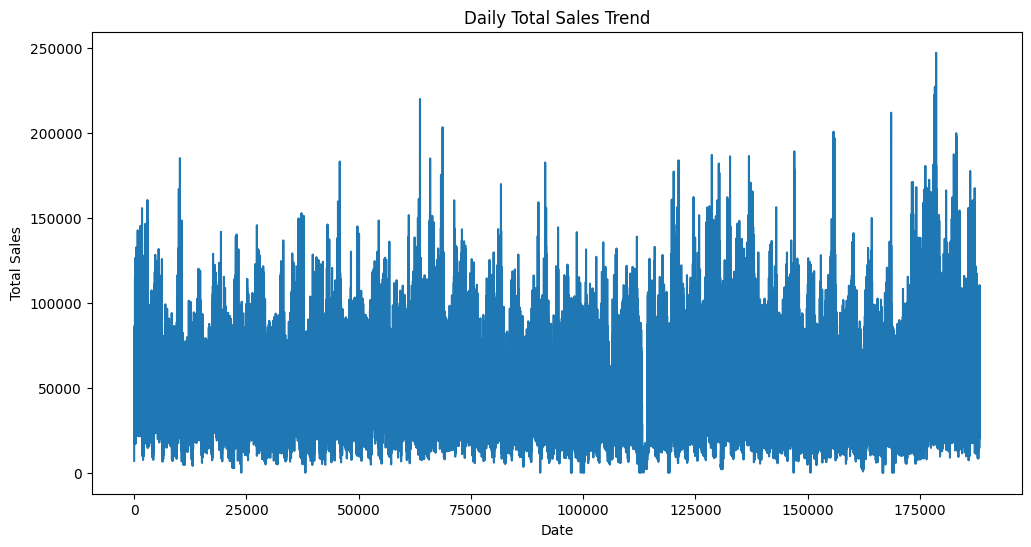

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is loaded and prepared as in previous sections
# Aggregate sales by date (since multiple stores per day)
daily_sales = df.groupby(df.index)['Sales'].sum()

# Plot overall trend
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Total Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()



Trend: Sales may show an upward or downward trend over years, influenced by economic factors or store expansions.

Store_Type Frequency:
 Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Location_Type Frequency:
 Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Region_Code Frequency:
 Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64


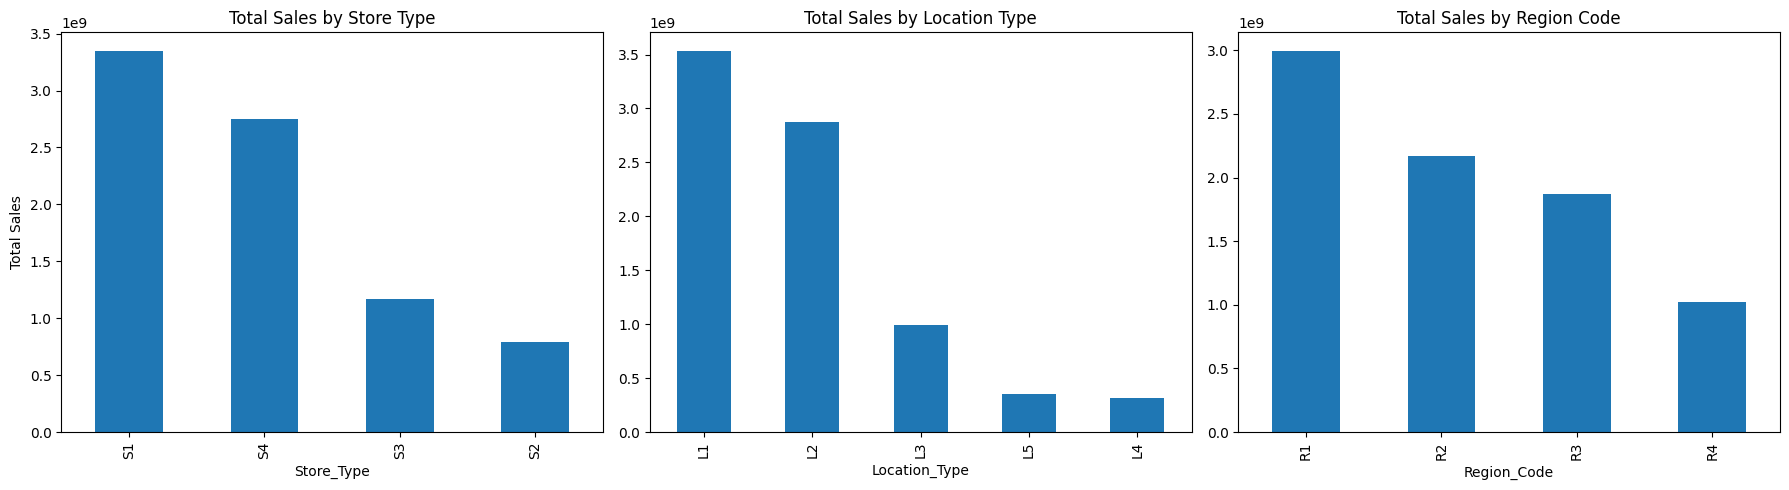


Average Sales by Store_Type:
 Store_Type
S1    37676.511694
S2    27530.828222
S3    47063.068209
S4    59945.685926
Name: Sales, dtype: float64

Average Sales by Location_Type:
 Location_Type
L1    41453.597889
L2    59231.480373
L3    33072.257756
L4    29067.414313
L5    25187.787261
Name: Sales, dtype: float64

Average Sales by Region_Code:
 Region_Code
R1    46765.488405
R2    40054.847344
R3    42144.517063
R4    39743.434249
Name: Sales, dtype: float64


In [10]:
# Frequency tables
print('Store_Type Frequency:\n', df['Store_Type'].value_counts())
print('\nLocation_Type Frequency:\n', df['Location_Type'].value_counts())
print('\nRegion_Code Frequency:\n', df['Region_Code'].value_counts())

# Bar charts for total sales by category
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# By Store_Type
store_sales = df.groupby('Store_Type')['Sales'].sum().sort_values(ascending=False)
store_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Store Type')
axes[0].set_ylabel('Total Sales')

# By Location_Type
loc_sales = df.groupby('Location_Type')['Sales'].sum().sort_values(ascending=False)
loc_sales.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Sales by Location Type')

# By Region_Code
region_sales = df.groupby('Region_Code')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', ax=axes[2])
axes[2].set_title('Total Sales by Region Code')

plt.tight_layout()
plt.show()

# Average sales for comparison
print('\nAverage Sales by Store_Type:\n', df.groupby('Store_Type')['Sales'].mean())
print('\nAverage Sales by Location_Type:\n', df.groupby('Location_Type')['Sales'].mean())
print('\nAverage Sales by Region_Code:\n', df.groupby('Region_Code')['Sales'].mean())

# HANDLING MISSING VALUES


In [ ]:
# Confirm missing values
missing = df.isnull().sum()
print('Missing Values per Column:\n', missing[missing > 0])

Missing Values per Column:
 Series([], dtype: int64)


# OUTLIER DETECTION


Number of Outliers in Sales (Z-score >3): 2421
        Sales  #Order  Holiday Discount
180  115665.3     154        1      Yes
306  126633.0     180        1      Yes
373  105243.0     142        0      Yes
403  104433.0     145        0      Yes
466  101577.0     152        0      Yes
Number of Outliers in Sales (IQR): 5843


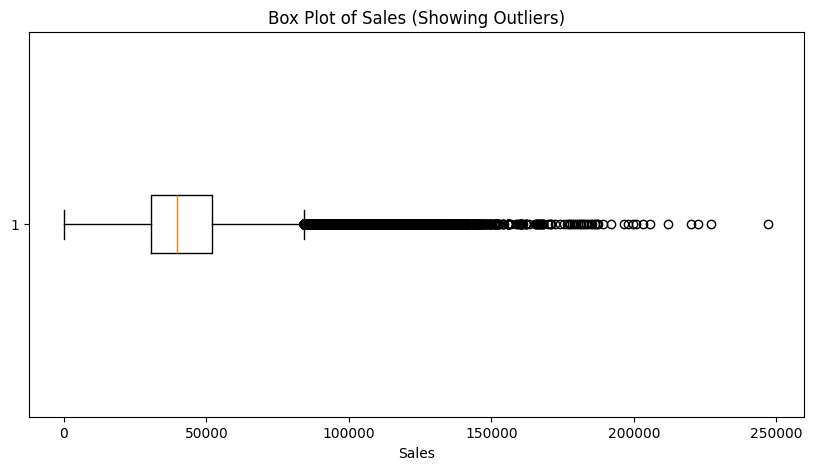

Sales after capping:
 count    188340.000000
mean      41993.602144
std       16137.188511
min           0.000000
25%       30426.000000
50%       39678.000000
75%       51909.000000
max       76809.300000
Name: Sales_Capped, dtype: float64


In [ ]:
import numpy as np
from scipy import stats

# Z-score for Sales
df['Sales_Z'] = stats.zscore(df['Sales'])
outliers_z = df[np.abs(df['Sales_Z']) > 3]
print(f'Number of Outliers in Sales (Z-score >3): {len(outliers_z)}')
print(outliers_z[['Sales', '#Order', 'Holiday', 'Discount']].head())  # Inspect context

# IQR for Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
print(f'Number of Outliers in Sales (IQR): {len(outliers_iqr)}')

# Visualize
plt.figure(figsize=(10, 5))
plt.boxplot(df['Sales'], vert=False)
plt.title('Box Plot of Sales (Showing Outliers)')
plt.xlabel('Sales')
plt.show()

# Handling: Cap outliers to 95th percentile (or remove if invalid)
upper_limit = df['Sales'].quantile(0.95)
df['Sales_Capped'] = np.where(df['Sales'] > upper_limit, upper_limit, df['Sales'])
print('Sales after capping:\n', df['Sales_Capped'].describe())

# HYPOTHESIS TESTING

Null Hypothesis H0 = Categories are independent of each other
Alternate Hypothesis H1 = Categories are dependent

In [14]:
Sales_yes = df[df['Discount']=="Yes"]['Sales']
sales_no = df[df['Discount']=="No"]['Sales']
t_stat, p_val = stats.ttest_ind(Sales_yes, sales_no, equal_var=False)
print("\n1️⃣ Discount Impact on Sales")
print("t-statistic =", t_stat, " p-value =", p_val)


1️⃣ Discount Impact on Sales
t-statistic = 145.92946158629138  p-value = 0.0


In [15]:
# 2. Effect of Holidays on Sales
holiday_sales = df[df['Holiday']==1]['Sales']
nonholiday_sales = df[df['Holiday']==0]['Sales']
t_stat, p_val = stats.ttest_ind(holiday_sales, nonholiday_sales, equal_var=False)
print("\n2️⃣ Holiday Impact on Sales")
print("t-statistic =", t_stat, " p-value =", p_val)


2️⃣ Holiday Impact on Sales
t-statistic = -66.1757648298698  p-value = 0.0


In [16]:
# 3. Sales Differences Across Store Types
store_groups = [group["Sales"].values for name, group in df.groupby("Store_Type")]
f_stat, p_val = stats.f_oneway(*store_groups)
print("\n3️⃣ Sales Across Store Types")
print("ANOVA F-statistic =", f_stat, " p-value =", p_val)


3️⃣ Sales Across Store Types
ANOVA F-statistic = 35123.64411601774  p-value = 0.0


In [17]:
# 4. Regional Sales Variability
region_groups = [group["Sales"].values for name, group in df.groupby("Region_Code")]
f_stat, p_val = stats.f_oneway(*region_groups)
print("\n4️⃣ Regional Sales Variability")
print("ANOVA F-statistic =", f_stat, " p-value =", p_val)


4️⃣ Regional Sales Variability
ANOVA F-statistic = 1682.4255287950677  p-value = 0.0


In [18]:
# 5. Correlation between Orders and Sales
pearson_corr, pearson_p = stats.pearsonr(df["#Order"], df["Sales"])
spearman_corr, spearman_p = stats.spearmanr(df["#Order"], df["Sales"])
print("\n5️⃣ Orders vs Sales Correlation")
print("Pearson Corr =", pearson_corr, " p-value =", pearson_p)
print("Spearman Corr =", spearman_corr, " p-value =", spearman_p)


5️⃣ Orders vs Sales Correlation
Pearson Corr = 0.941600564612576  p-value = 0.0
Spearman Corr = 0.9377462542885381  p-value = 0.0


# ML MODELLING


In [19]:
# 1. Data Cleaning
# Check for missing values again (already done but good to re-confirm)
print("Missing values before cleaning:\n", df.isnull().sum())

# No missing values were found in the previous steps, so no imputation is needed here.

# Check for duplicates (optional, depending on data structure)
print("\nNumber of duplicate rows:", df.duplicated().sum())
# If there were duplicates, you could remove them using df.drop_duplicates(inplace=True)

# Ensure 'Date' column is datetime objects
df['Date'] = pd.to_datetime(df['Date'])
print("\nData types after converting 'Date':\n", df.dtypes)

Missing values before cleaning:
 ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

Number of duplicate rows: 0

Data types after converting 'Date':
 ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object


In [20]:
# 2. Feature Engineering

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday # Monday=0, Sunday=6
df['Weekofyear'] = df['Date'].dt.isocalendar().week.astype(int)

# Create a feature for the day of the year
df['Dayofyear'] = df['Date'].dt.dayofyear

# Create lag features for Sales (example: sales from the previous day)
# This requires sorting by Date and Store_id to ensure correct lagging within each store's time series
df = df.sort_values(by=['Store_id', 'Date'])
df['Sales_Lag1'] = df.groupby('Store_id')['Sales'].shift(1)

# Create rolling window features (example: average sales over the last 7 days)
df['Sales_RollingMean7'] = df.groupby('Store_id')['Sales'].rolling(window=7).mean().reset_index(level=0, drop=True)

# Fill NaNs created by lagging and rolling (e.g., with 0 or a forward fill)
df['Sales_Lag1'].fillna(0, inplace=True) # or use fillna(method='ffill')
df['Sales_RollingMean7'].fillna(df['Sales'].mean(), inplace=True) # Using mean of the whole Sales column for simplicity

# Interaction term example: Sales on holidays with discount
df['Holiday_Discount_Interaction'] = df['Holiday'] * df['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nDataFrame after Feature Engineering:\n", df.head())


DataFrame after Feature Engineering:
             ID  Store_id Store_Type Location_Type Region_Code       Date  \
0     T1000001         1         S1            L3          R1 2018-01-01   
607   T1000608         1         S1            L3          R1 2018-01-02   
1046  T1001047         1         S1            L3          R1 2018-01-03   
1207  T1001208         1         S1            L3          R1 2018-01-04   
1752  T1001753         1         S1            L3          R1 2018-01-05   

      Holiday Discount  #Order     Sales  Year  Month  Day  Weekday  \
0           1      Yes       9   7011.84  2018      1    1        0   
607         0      Yes      60  42369.00  2018      1    2        1   
1046        0      Yes      72  50037.00  2018      1    3        2   
1207        0      Yes      64  44397.00  2018      1    4        3   
1752        0      Yes      63  47604.00  2018      1    5        4   

      Weekofyear  Dayofyear  Sales_Lag1  Sales_RollingMean7  \
0             

In [21]:
# 3. Data Transformation

# Encode categorical variables ('Store_Type', 'Location_Type', 'Region_Code', 'Discount')
df = pd.get_dummies(df, columns=['Store_Type', 'Location_Type', 'Region_Code', 'Discount'], drop_first=True)

# Scale numerical features ('#Order', 'Sales', 'Sales_Lag1', 'Sales_RollingMean7', etc.)
# It's important NOT to scale the target variable 'Sales' if you're predicting the raw sales value.
# Scale features used for prediction: '#Order', engineered features
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = ['#Order', 'Sales_Lag1', 'Sales_RollingMean7', 'Year', 'Month', 'Day', 'Weekday', 'Weekofyear', 'Dayofyear']
# Add other engineered numerical features here

scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("\nDataFrame after Data Transformation:\n", df.head())


DataFrame after Data Transformation:
             ID  Store_id       Date  Holiday    #Order     Sales      Year  \
0     T1000001         1 2018-01-01        1 -1.943251   7011.84 -0.643194   
607   T1000608         1 2018-01-02        0 -0.269328  42369.00 -0.643194   
1046  T1001047         1 2018-01-03        0  0.124537  50037.00 -0.643194   
1207  T1001208         1 2018-01-04        0 -0.138039  44397.00 -0.643194   
1752  T1001753         1 2018-01-05        0 -0.170861  47604.00 -0.643194   

         Month       Day   Weekday  ...  Store_Type_S3  Store_Type_S4  \
0    -1.323177 -1.672736 -1.496987  ...          False          False   
607  -1.323177 -1.558881 -0.996374  ...          False          False   
1046 -1.323177 -1.445027 -0.495762  ...          False          False   
1207 -1.323177 -1.331172  0.004851  ...          False          False   
1752 -1.323177 -1.217317  0.505464  ...          False          False   

      Location_Type_L2  Location_Type_L3  Location_Ty

In [22]:
# 4. Train-Test Split

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude 'ID' and original 'Date' as they are not features for the model
# Also exclude the original 'Sales' column as we are predicting it, and 'Sales_Capped' if you created it for outlier handling but want to predict original Sales.
# Keep the engineered Sales features as they are used for prediction.
X = df.drop(['ID', 'Date', 'Sales'], axis=1) # Adjust 'Sales' if you want to predict 'Sales_Capped'
y = df['Sales'] # Adjust if you want to predict 'Sales_Capped'

# Split data into training and testing sets
# For time series data, a simple random split might not be ideal.
# A better approach is to split based on time, using older data for training and newer for testing.
# For this general data preprocessing step, a standard split is used, but for forecasting, consider a time-based split.

# Example of a standard train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (150672, 23)
Testing features shape: (37668, 23)
Training target shape: (150672,)
Testing target shape: (37668,)


## 2. Model Selection and Training

Let's start with a baseline model, Linear Regression, to establish a performance benchmark.

In [23]:
# 5. Model Selection and Training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
baseline_model = LinearRegression()

# Train the model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("\nBaseline Model (Linear Regression) Evaluation:")
print(f"Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"R-squared (R2): {r2_baseline:.2f}")




Baseline Model (Linear Regression) Evaluation:
Mean Squared Error (MSE): 21924104.88
R-squared (R2): 0.94


In [24]:
# Add a more complex model: RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
# You can adjust hyperparameters like n_estimators, max_depth, etc.
complex_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
complex_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_complex = complex_model.predict(X_test)

# Evaluate the complex model
mse_complex = mean_squared_error(y_test, y_pred_complex)
r2_complex = r2_score(y_test, y_pred_complex)

print("\nComplex Model (RandomForestRegressor) Evaluation:")
print(f"Mean Squared Error (MSE): {mse_complex:.2f}")
print(f"R-squared (R2): {r2_complex:.2f}")

# Compare with baseline
print("\nComparison with Baseline Model (Linear Regression):")
print(f"Baseline MSE: {mse_baseline:.2f}, R2: {r2_baseline:.2f}")
print(f"RandomForestRegressor MSE: {mse_complex:.2f}, R2: {r2_complex:.2f}")


Complex Model (RandomForestRegressor) Evaluation:
Mean Squared Error (MSE): 8704056.19
R-squared (R2): 0.98

Comparison with Baseline Model (Linear Regression):
Baseline MSE: 21924104.88, R2: 0.94
RandomForestRegressor MSE: 8704056.19, R2: 0.98


## 3. Model Evaluation and Validation

Let's evaluate the performance of the trained models using appropriate metrics.

In [25]:
# 6. Model Evaluation and Validation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for RMSE calculation

# Assuming y_test, y_pred_baseline, and y_pred_complex are already available from previous steps

# Evaluate Baseline Model (Linear Regression)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline) # MSE was already calculated
r2_baseline = r2_score(y_test, y_pred_baseline) # R2 was already calculated

print("Baseline Model (Linear Regression) Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_baseline:.2f}")
print(f"Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_baseline:.2f}")
print(f"R-squared (R2): {r2_baseline:.2f}")

# Evaluate Complex Model (RandomForestRegressor)
mae_complex = mean_absolute_error(y_test, y_pred_complex)
rmse_complex = np.sqrt(mse_complex) # MSE was already calculated
r2_complex = r2_score(y_test, y_pred_complex) # R2 was already calculated

print("\nComplex Model (RandomForestRegressor) Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_complex:.2f}")
print(f"Mean Squared Error (MSE): {mse_complex:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_complex:.2f}")
print(f"R-squared (R2): {r2_complex:.2f}")



Baseline Model (Linear Regression) Evaluation Metrics:
Mean Absolute Error (MAE): 3360.82
Mean Squared Error (MSE): 21924104.88
Root Mean Squared Error (RMSE): 4682.32
R-squared (R2): 0.94

Complex Model (RandomForestRegressor) Evaluation Metrics:
Mean Absolute Error (MAE): 2036.04
Mean Squared Error (MSE): 8704056.19
Root Mean Squared Error (RMSE): 2950.26
R-squared (R2): 0.98
